# 1) Machine Learning Technique Selection and Justification

## Techniques Selection:
Suitable techniques are:

Logistic Regression: Because of its simplicity and interpretability.\
Random Forest: To capture non-linear relationships and complicated patterns.

## Justification:
Logistic Regression:\
It's chosen for its interpretability, which is important when communicating forecasts to stakeholders or compliance departments. In the context of customer churn prediction, understanding the factors that contribute to a customer's likelihood to churn is crucial. Logistic Regression's interpretability helps in identifying these factors transparently.

Random Forest:\
It's elected for its ability to capture complex patterns in the data, which may be crucial for accurately predicting customer churn. Customer churn prediction problems are likely to involve non-linear relationships between features and the target variable. Random Forest's ability to capture such complexities makes it a suitable choice.

# 2) Pipeline Explanation

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

In [6]:
data = pd.read_csv('BCCP.CSV')
data.head()

customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0              0          93826.63      0  
4                1            1              1          79084.10      0

In [7]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split

# 'data' with features and target variable 'churn'
X = data.drop('churn', axis=1)  # Features
y = data['churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Separate numerical and categorical features
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender', 'credit_card', 'active_member']

# Define the pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'products_number',
                                                   'estimated_salary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['country', 'gender',
                                                   'credit_card',
                                                   'active_member'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

A Pipeline class, The pipeline comprises two main steps: first, a preprocessor that employs a ColumnTransformer to separately apply StandardScaler to numeric features and OneHotEncoder to categorical features. The numeric features include 'credit_score', 'age', 'tenure', 'balance', 'products_number', and 'estimated_salary', while categorical features encompass 'country', 'gender', 'credit_card', and 'active_member'. The second step involves a RandomForestClassifier with 100 estimators, configured with a random_state of 42. This pipeline is designed for efficient preprocessing and training of a RandomForestClassifier on a dataset with a combination of numerical and categorical features.

# 3) Results: Train, Testing, and Validation

In [10]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)


Accuracy: 0.87
Confusion Matrix:
 [[1554   53]
 [ 207  186]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



The predictive model demonstrated a commendable 87% accuracy in forecasting bank customer churn. Notably, it exhibited proficiency in discerning customers who did not churn (class 0). However, there is an identified opportunity for enhancement in predicting churned customers (class 1). Strategic recommendations encompass the optimization of hyperparameters, exploration of alternative models, and incorporation of additional features to refine predictive efficacy. These adjustments should be carefully guided by the business context, emphasizing the pertinent costs associated with misclassification.

# Task 04:

### Import necessary libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score

### We have already loaded our dataset, so we'll directly perform EDA on our dataset to get insights about our data.

In [12]:
print(data.describe())

        customer_id  credit_score           age        tenure        balance  \
count  1.000000e+04  10000.000000  10000.000000  10000.000000   10000.000000   
mean   1.569094e+07    650.528800     38.921800      5.012800   76485.889288   
std    7.193619e+04     96.653299     10.487806      2.892174   62397.405202   
min    1.556570e+07    350.000000     18.000000      0.000000       0.000000   
25%    1.562853e+07    584.000000     32.000000      3.000000       0.000000   
50%    1.569074e+07    652.000000     37.000000      5.000000   97198.540000   
75%    1.575323e+07    718.000000     44.000000      7.000000  127644.240000   
max    1.581569e+07    850.000000     92.000000     10.000000  250898.090000   

       products_number  credit_card  active_member  estimated_salary  \
count     10000.000000  10000.00000   10000.000000      10000.000000   
mean          1.530200      0.70550       0.515100     100090.239881   
std           0.581654      0.45584       0.499797      57510.4

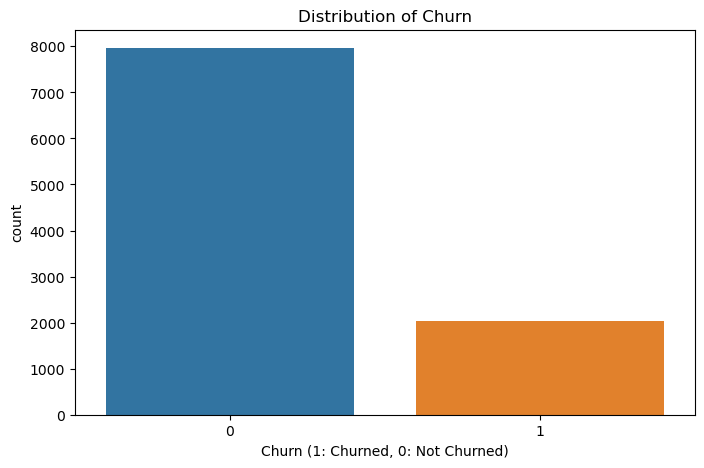

In [13]:
#Target Variable: Churn
plt.figure(figsize=(8, 5))
sns.countplot(x='churn', data=data)
plt.title('Distribution of Churn')
plt.xlabel('Churn (1: Churned, 0: Not Churned)')
plt.show()


##### The plot provides a clear visual representation of the distribution of churn, making it easy to get the proportions of churned and non-churned customers. There are more customer who didn't churn. 

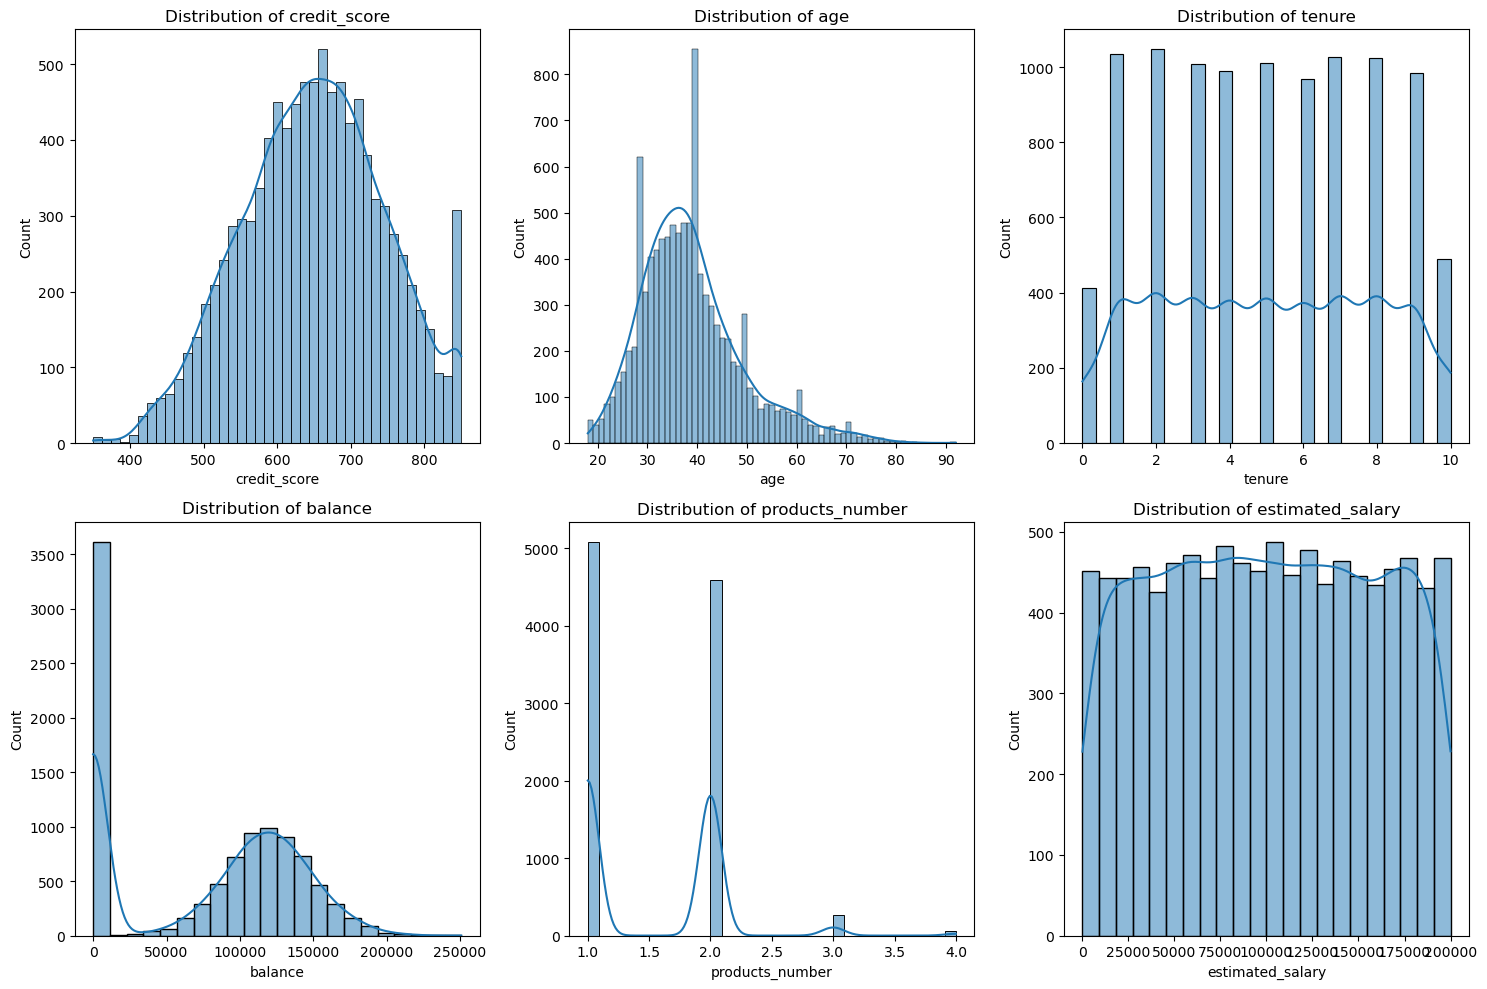

In [14]:
# for Numerical Features of our dataset
numerical_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

These 6 histogram, Show the distribution of a different numerical feature in the dataset.\
In credit score, Most customers have credit scores between 600 and 800, with a slight skew towards higher scores.\
In Age, The distribution is roughly bell-shaped, with most customers in their 30s to 50s.\
In tenure, The distribution is skewed right, with a peak around 2 years.
In Balance, The distribution is heavily skewed right, indicating a wide range of balances. Most customers have balances below 100,000, but a few have significantly higher balances.\
In estimated salary, The distribution is roughly bell-shaped.


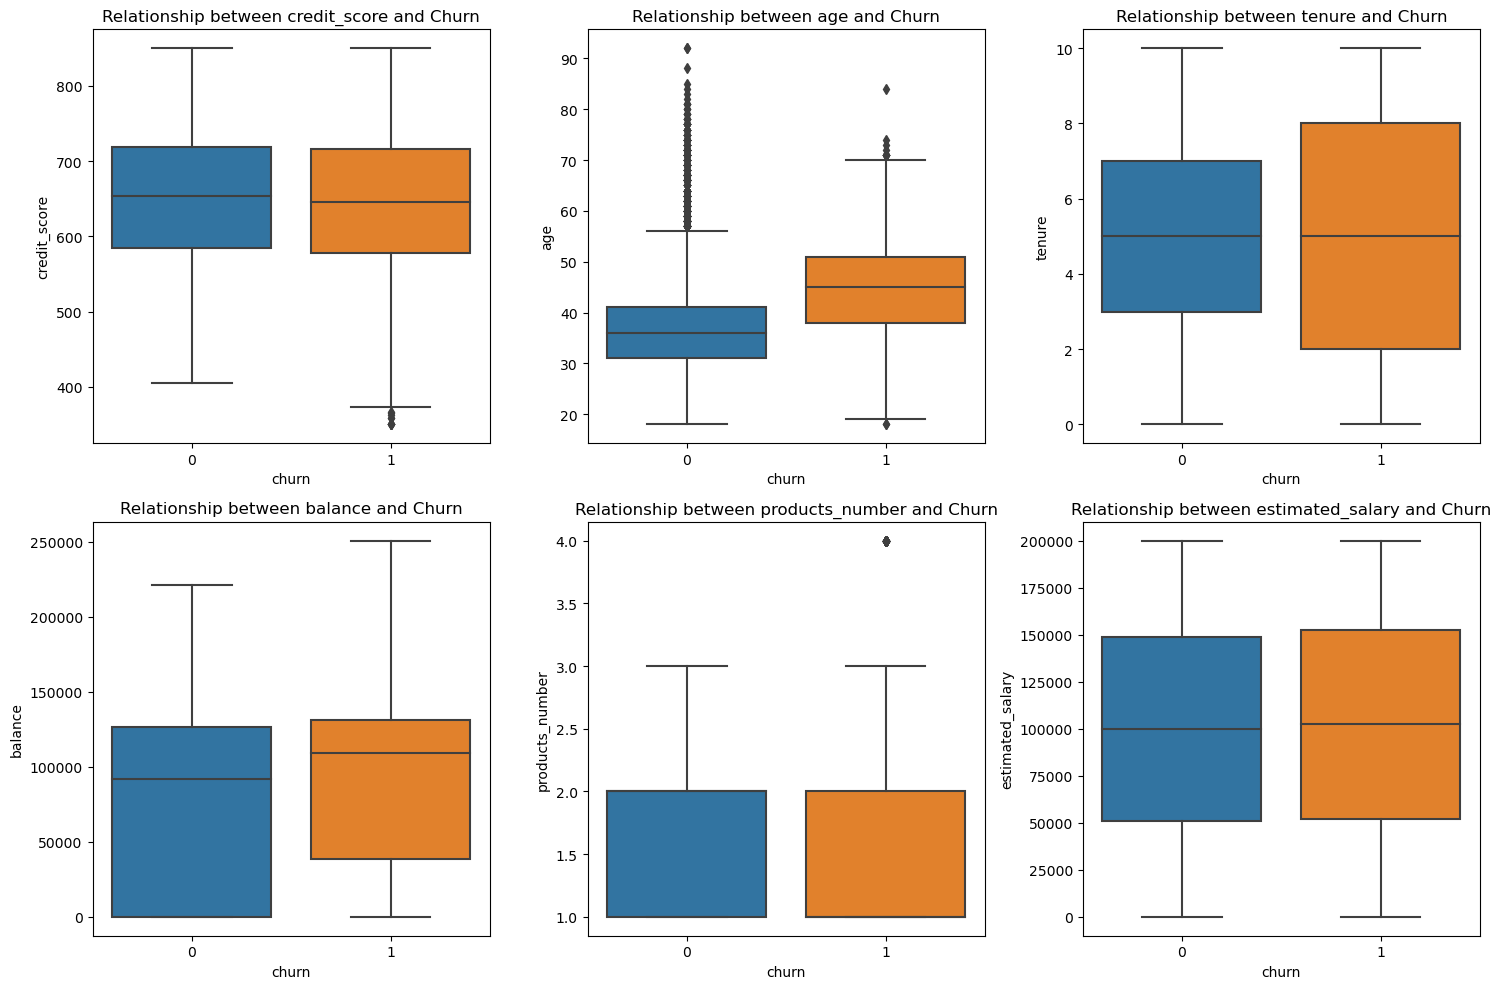

In [15]:
# Between numerical features and the target variable
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='churn', y=feature, data=data)
    plt.title(f'Relationship between {feature} and Churn')

plt.tight_layout()
plt.show()


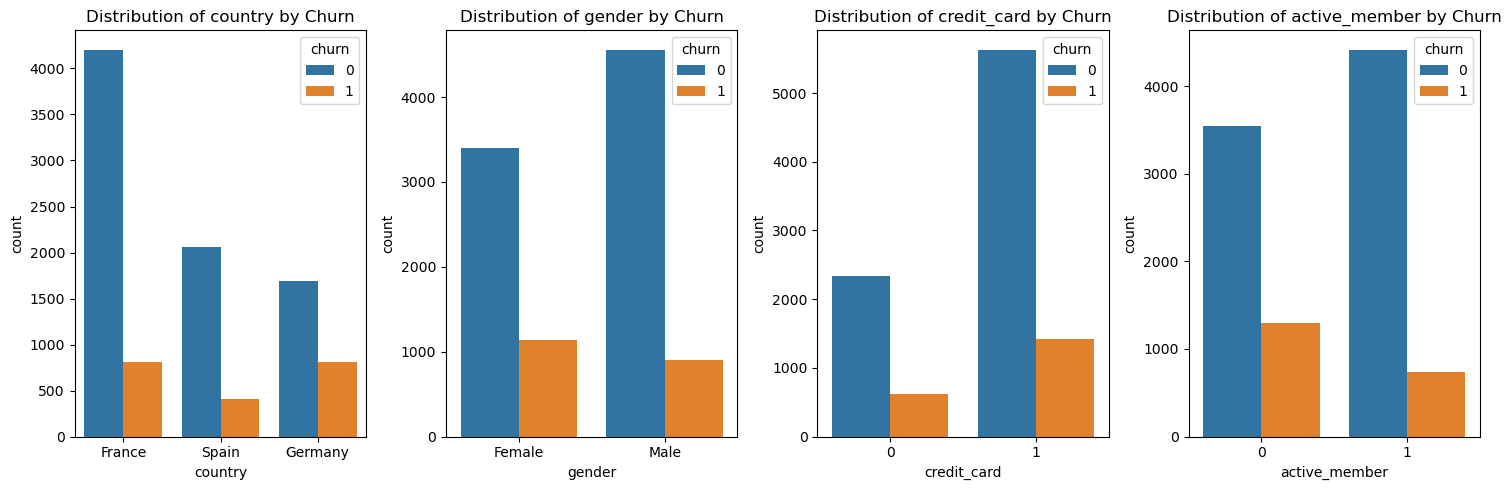

In [16]:
# for Categorical Features 
categorical_features = ['country', 'gender', 'credit_card', 'active_member']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, hue='churn', data=data)
    plt.title(f'Distribution of {feature} by Churn')

plt.tight_layout()
plt.show()

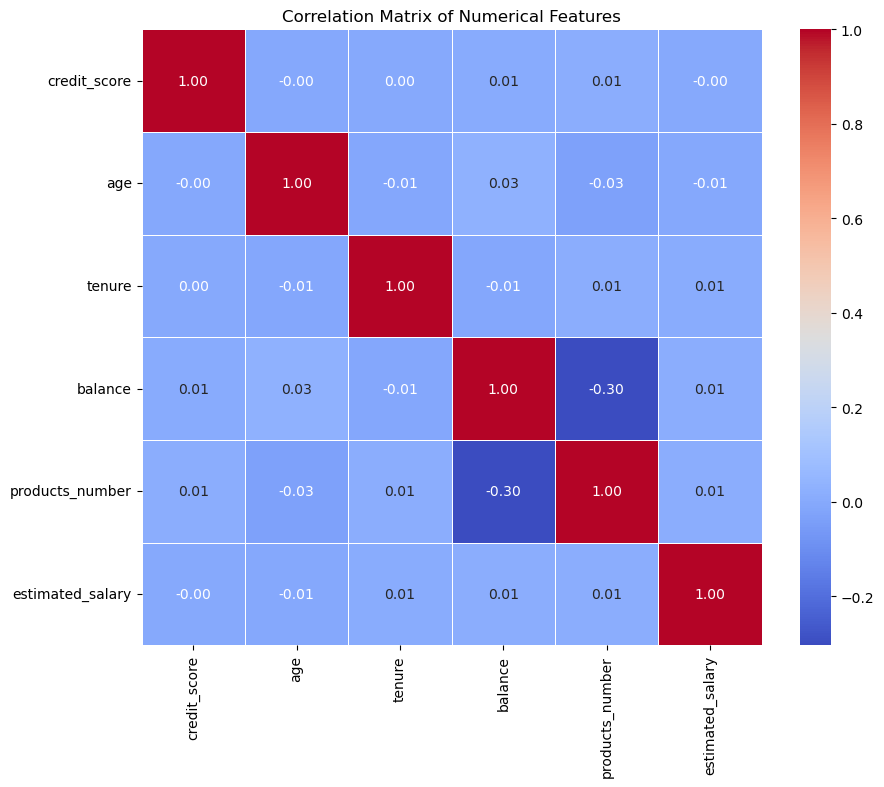

In [17]:
# Correlations between numerical features
correlation_matrix = data[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### Data Preprocessing

In [18]:
#Drop irrelevant Column
data = data.drop(['customer_id'], axis=1)

In [19]:
# Split the data into features and target
X = data.drop('churn', axis=1)
y = data['churn']

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Define preprocessing for numerical and categorical features
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['country', 'gender', 'credit_card', 'active_member']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [22]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


### Model

In [23]:
# Define the model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])


In [24]:
# Training the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['credit_score', 'age',
                                                   'tenure', 'balance',
                                                   'products_number',
                                                   'estimated_salary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                

In [25]:
# Predictions on the test set
y_pred = pipeline.predict(X_test)

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [27]:
print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.87
ROC AUC Score: 0.7201508666758506
Confusion Matrix:
[[1554   53]
 [ 207  186]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000



In [28]:
cv_scores = cross_val_score(pipeline, X, y, cv=5)
print(f"Cross-Validation Scores: {cv_scores}")

Cross-Validation Scores: [0.857 0.868 0.856 0.865 0.85 ]


### Visualization EDA and Model Results

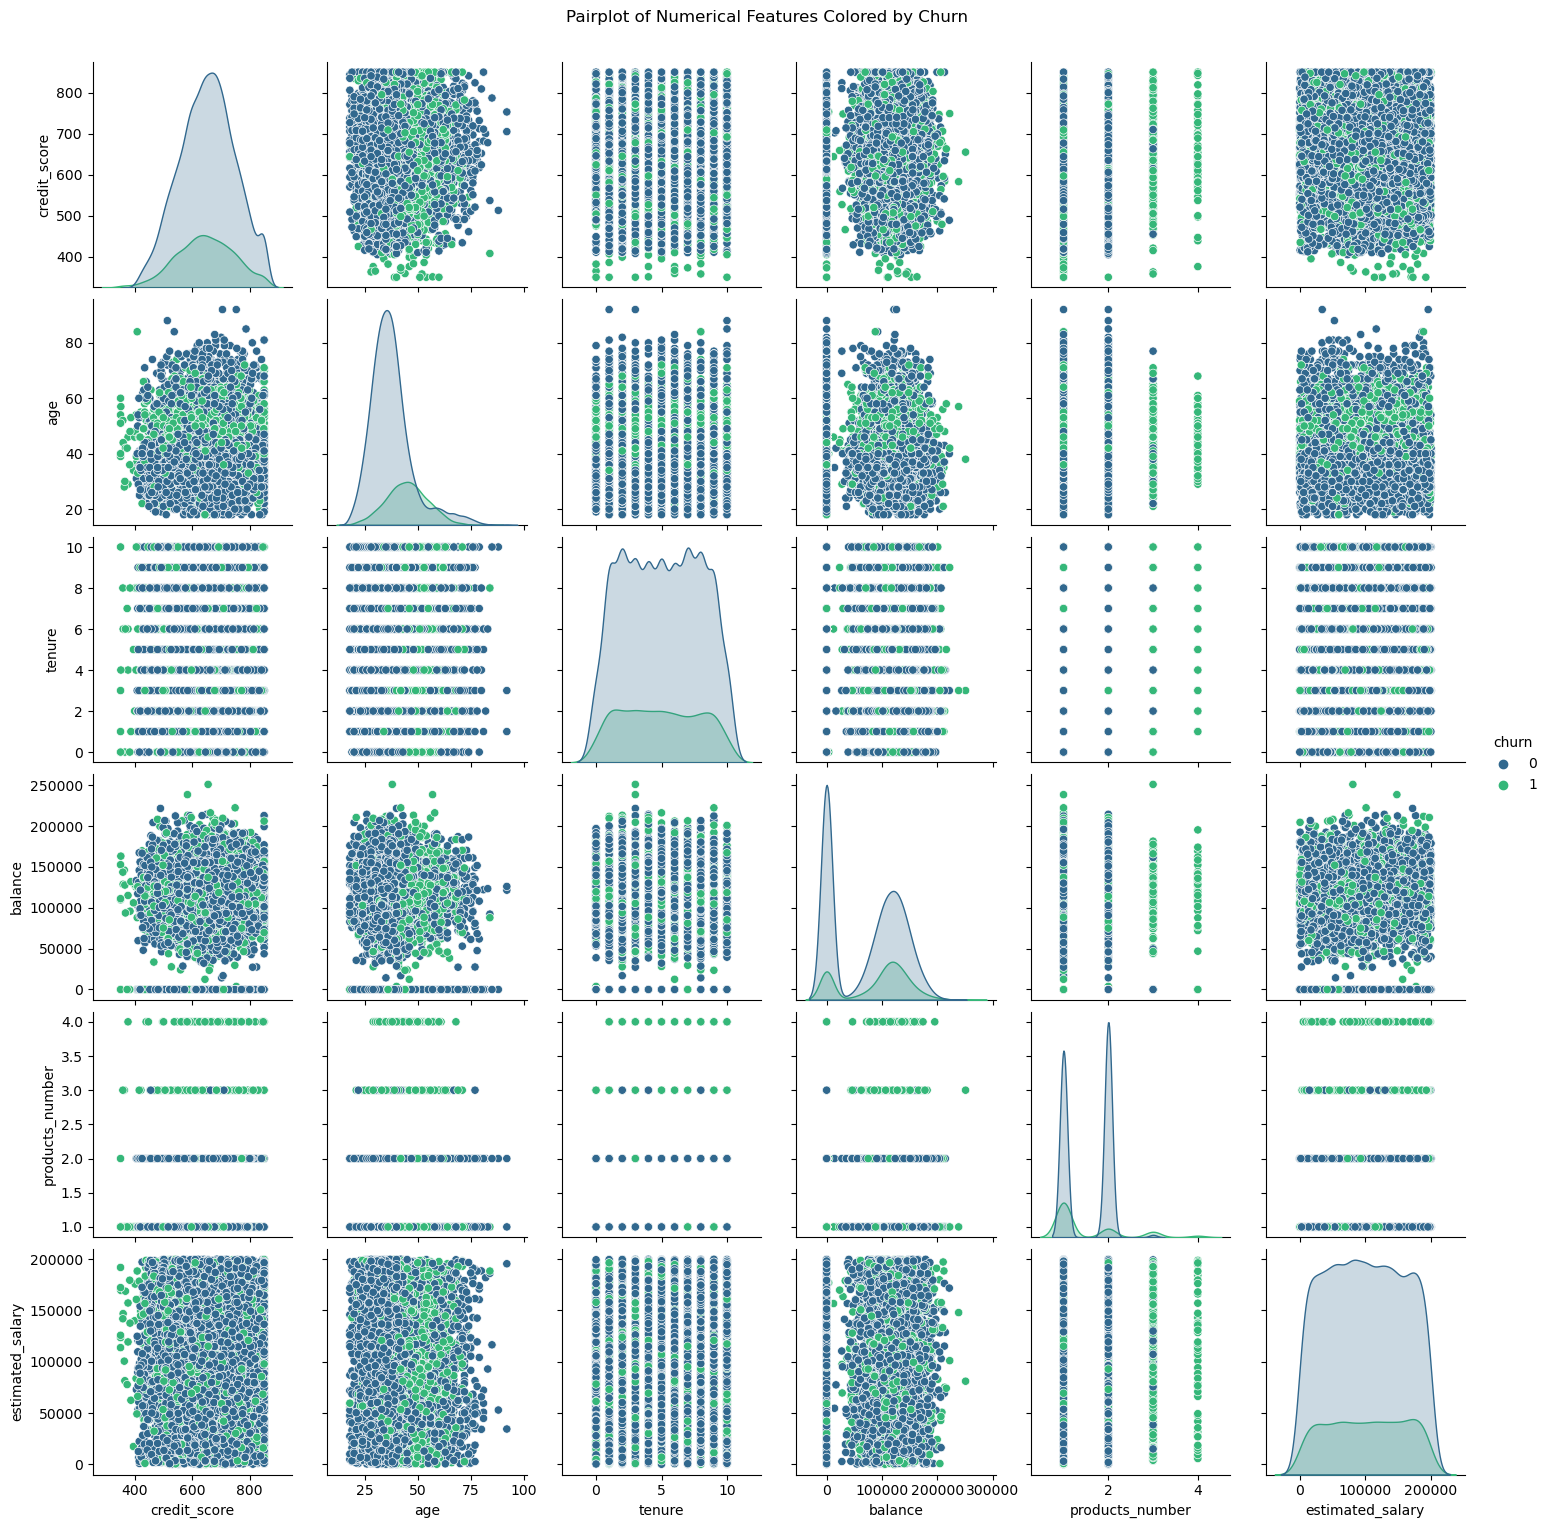

In [29]:
sns.pairplot(data, hue='churn', vars=numerical_features, diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot of Numerical Features Colored by Churn', y=1.02)
plt.show()

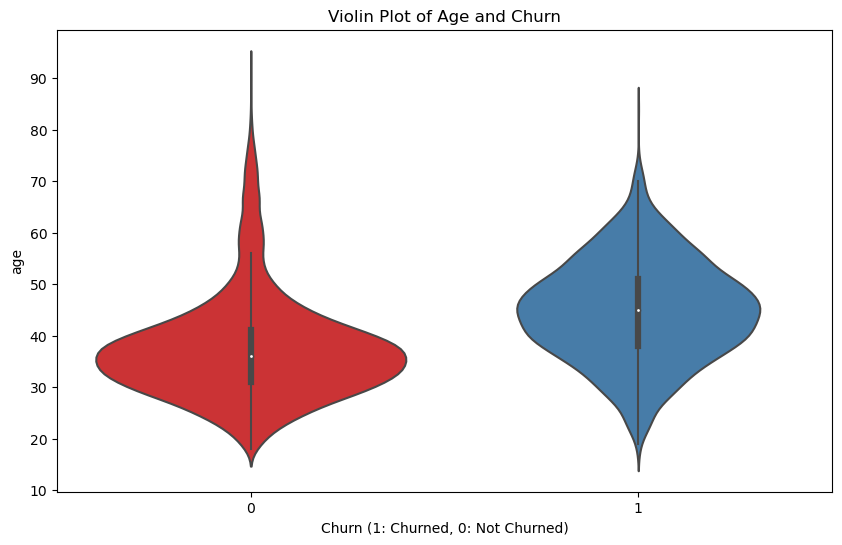

In [30]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='churn', y='age', data=data, palette='Set1')
plt.title('Violin Plot of Age and Churn')
plt.xlabel('Churn (1: Churned, 0: Not Churned)')
plt.show()

The violin plot visually reveals that the distribution of age differs between customers who churned and those who did not. This suggests that age has a potential relationship with churn behavior.
Younger customers being somewhat more likely to churn. The distribution for non-churned customers is centered around slightly older ages, with a peak around the mid-40s.

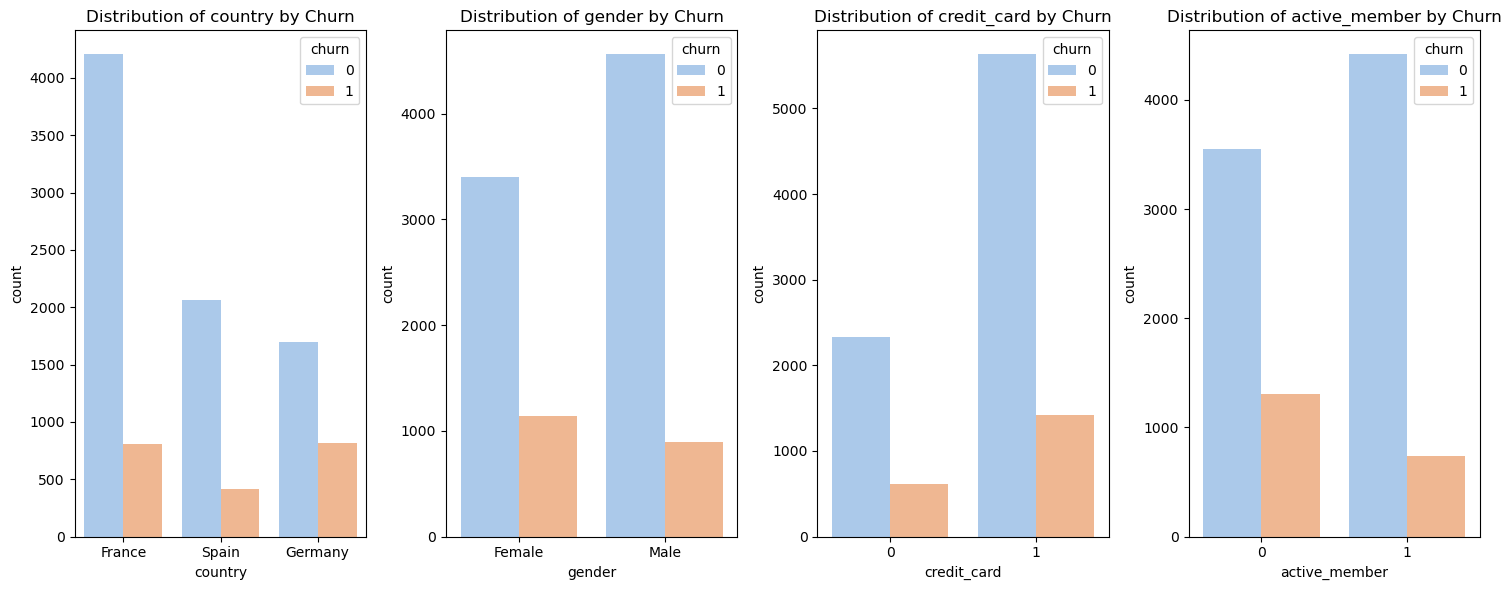

In [31]:
plt.figure(figsize=(15, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 4, i)
    sns.countplot(x=feature, hue='churn', data=data, palette='pastel')
    plt.title(f'Distribution of {feature} by Churn')

plt.tight_layout()
plt.show()

C:\Users\S H K\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


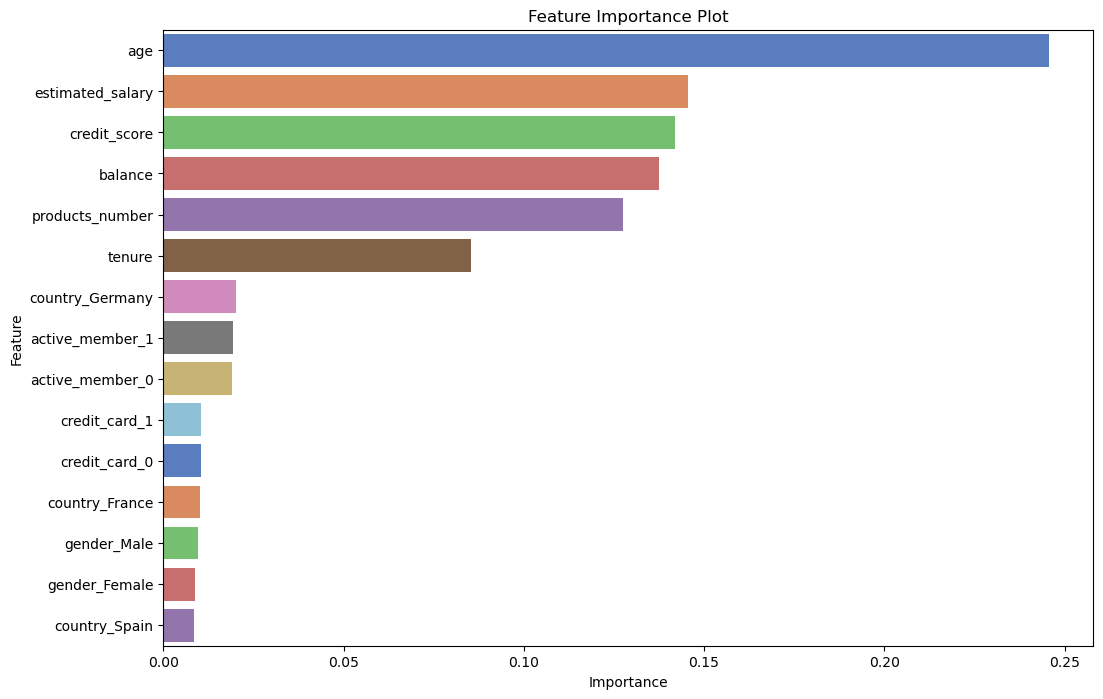

In [32]:
# Feature Importance Plot
feature_importance = pipeline.named_steps['model'].feature_importances_
features = numerical_features + list(pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].get_feature_names(categorical_features))
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='muted')
plt.title('Feature Importance Plot')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


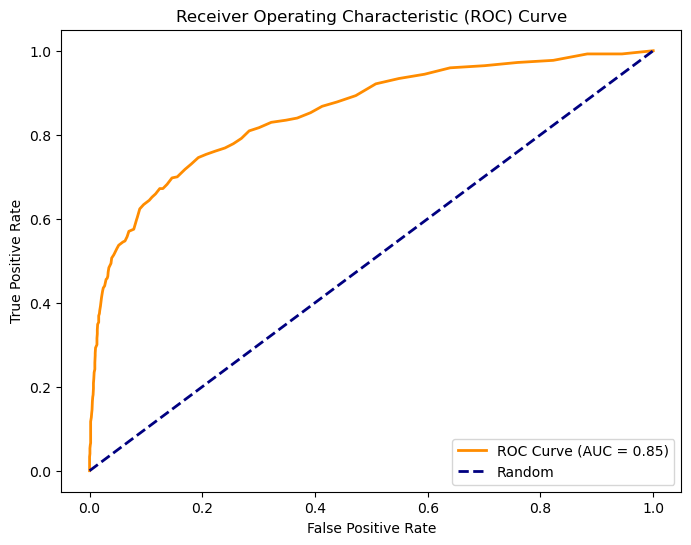

In [33]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

The model isn't perfect, Model has a good AUC of 0.85, meaning it can distinguish churned and non-churned customers better than random. 

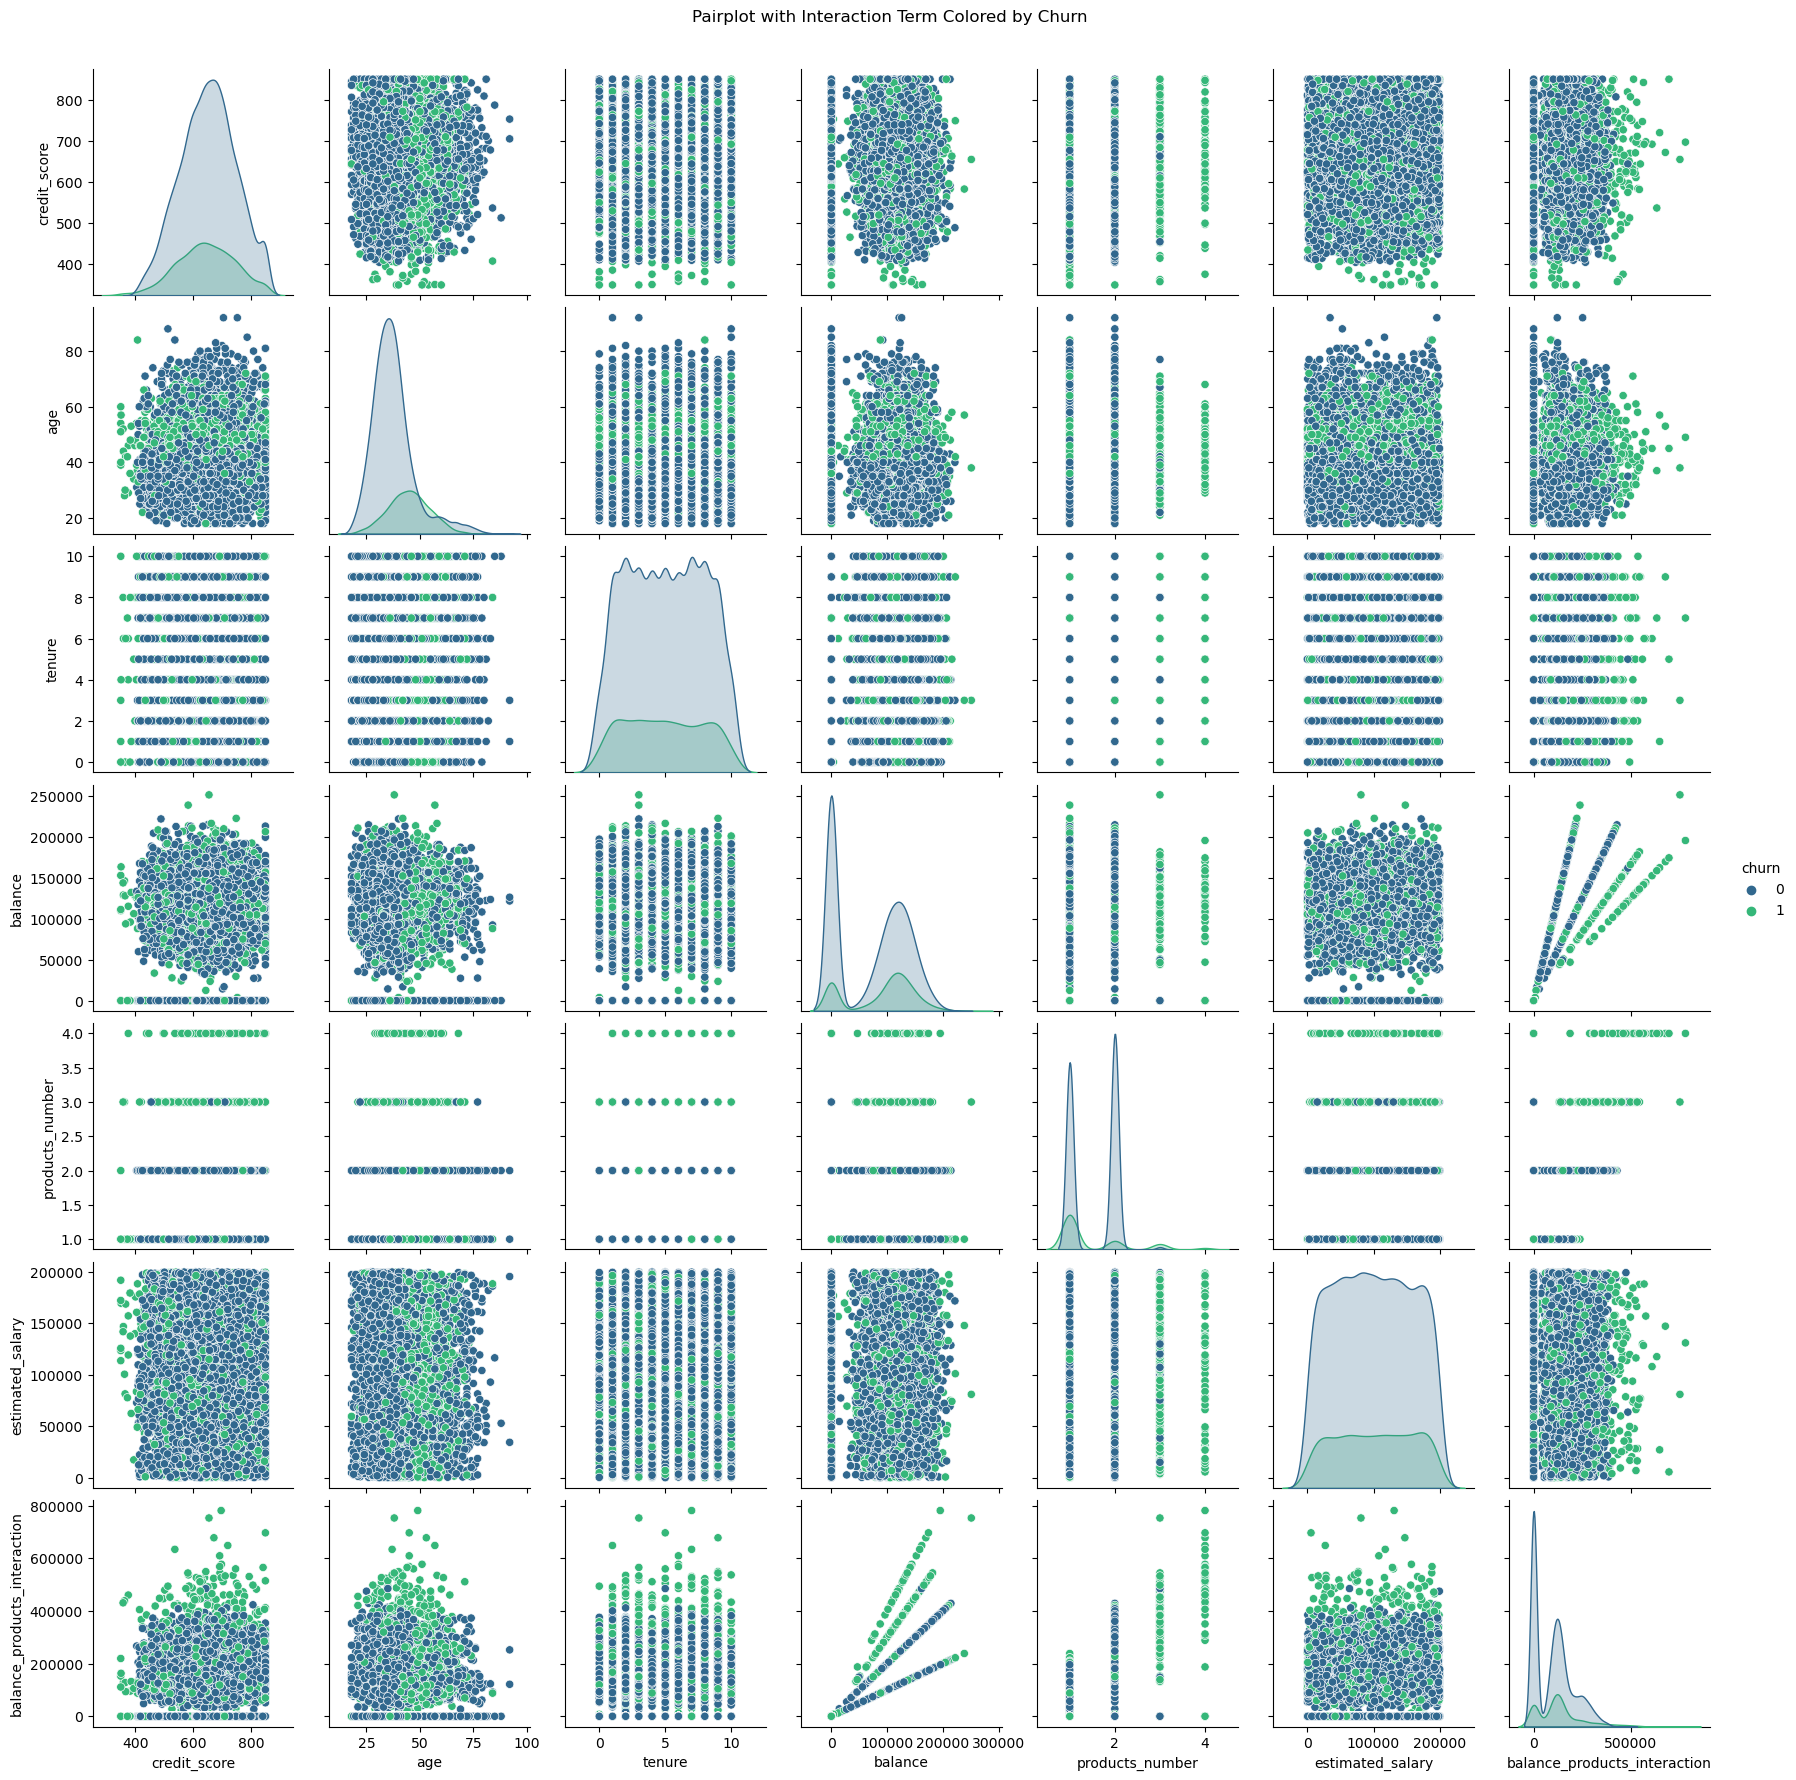

In [35]:
# Create Interaction Term: balance * products_number
data['balance_products_interaction'] = data['balance'] * data['products_number']

# Pairplot with Interaction Term
sns.pairplot(data, hue='churn', vars=numerical_features + ['balance_products_interaction'], diag_kind='kde', palette='viridis')
plt.suptitle('Pairplot with Interaction Term Colored by Churn', y=1.02)
plt.show()


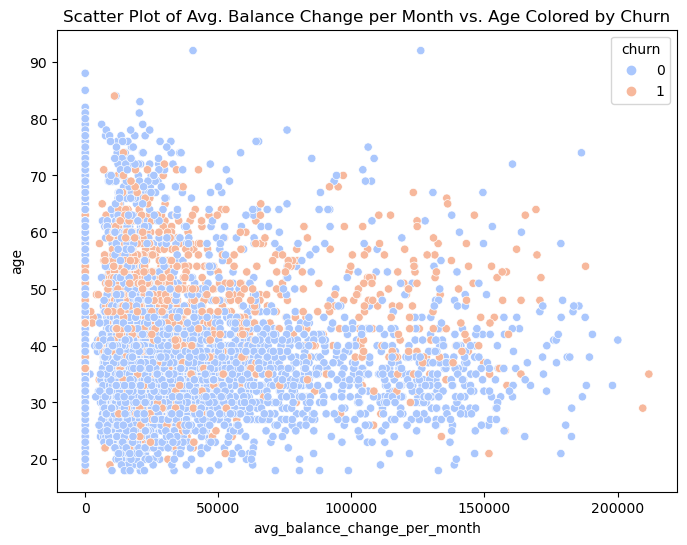

In [36]:
# Create Temporal Feature: average balance change per month
data['avg_balance_change_per_month'] = data['balance'] / data['tenure']

# Scatter plot of Temporal Feature vs. Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_balance_change_per_month', y='age', hue='churn', data=data, palette='coolwarm')
plt.title('Scatter Plot of Avg. Balance Change per Month vs. Age Colored by Churn')
plt.show()


C:\Users\S H K\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


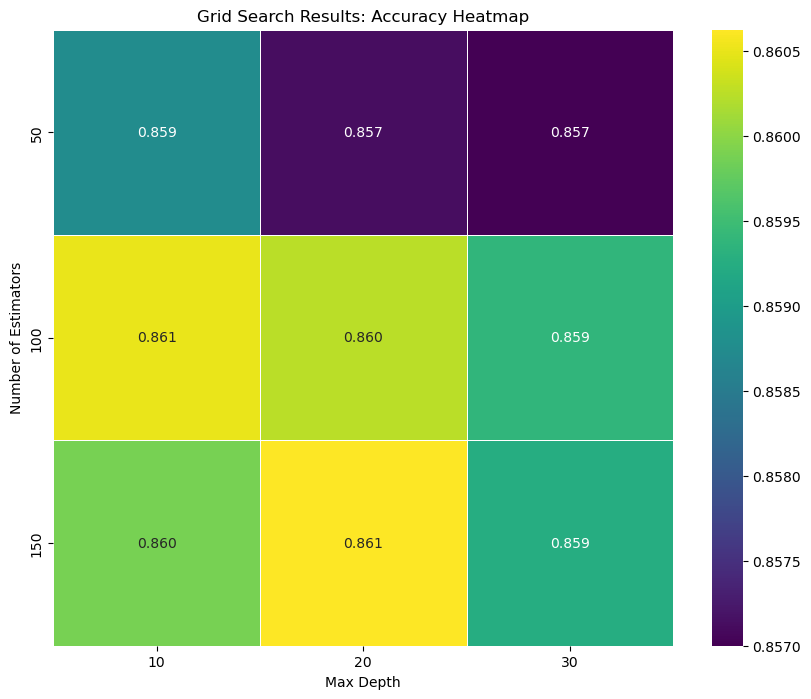

Best Hyperparameters: {'classifier__max_depth': 20, 'classifier__n_estimators': 150}


In [39]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'classifier__n_estimators': [50, 100, 150],
    'classifier__max_depth': [10, 20, 30]
}

# Create a pipeline with preprocessor and Random Forest Classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Create a GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Extract grid search results for analysis
results = pd.DataFrame(grid_search.cv_results_)

# Heatmap of Grid Search Results
heatmap_data = results.pivot(index='param_classifier__n_estimators', columns='param_classifier__max_depth', values='mean_test_score')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f", linewidths=0.5)
plt.title('Grid Search Results: Accuracy Heatmap')
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.show()

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


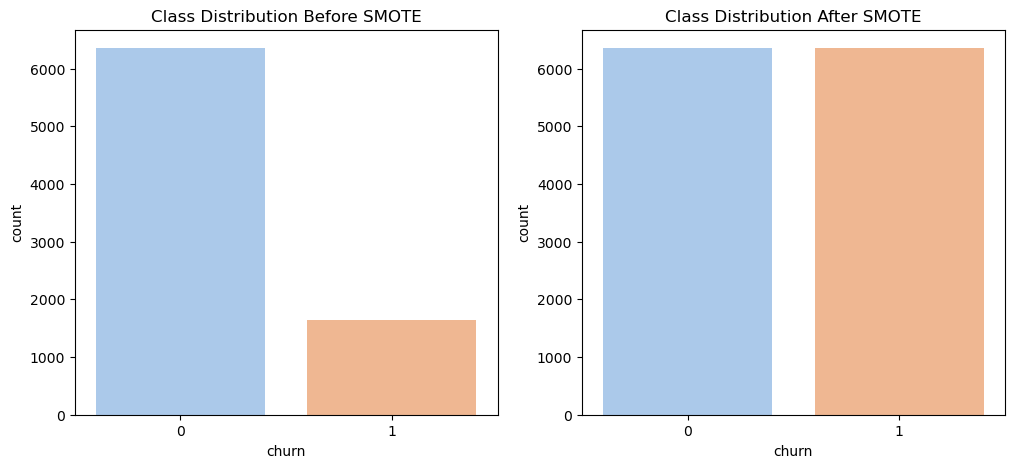

In [44]:
from imblearn.over_sampling import SMOTENC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Separate numerical and categorical features
numeric_features = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
categorical_features = ['country', 'gender', 'credit_card', 'active_member']

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply SMOTENC to balance the classes
smote = SMOTENC(random_state=42, categorical_features=[X_train.columns.get_loc(col) for col in categorical_features])
X_resampled, y_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

# Get feature names after one-hot encoding
feature_names = list(preprocessor.transformers_[1][1].get_feature_names_out(categorical_features))

# Visualize class distribution before and after SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='churn', data=pd.concat([X_train, y_train], axis=1), palette='pastel')
plt.title('Class Distribution Before SMOTE')

# Create a dataframe for the resampled data with feature names
resampled_df = pd.DataFrame(X_resampled, columns=numeric_features + feature_names)
resampled_df['churn'] = y_resampled

plt.subplot(1, 2, 2)
sns.countplot(x='churn', data=resampled_df, palette='pastel')
plt.title('Class Distribution After SMOTE')

plt.show()




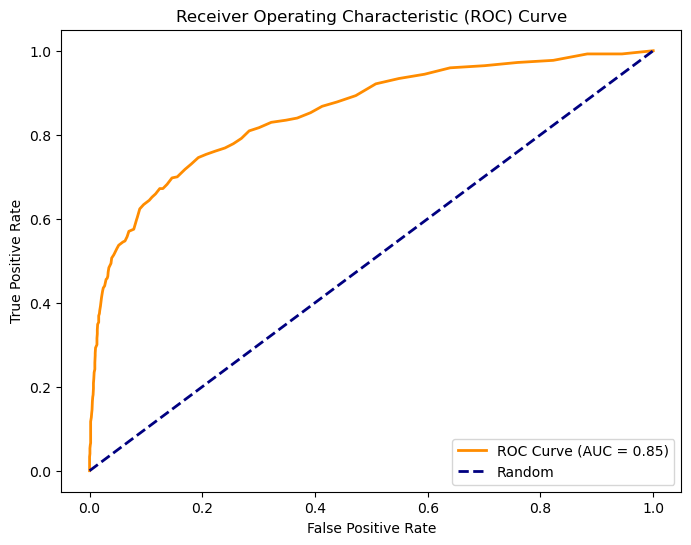

In [48]:
from sklearn.metrics import roc_curve, auc

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, pipeline.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


